In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import plotly.express as px

data = "../../day_1/lab-eda-univariate/amz_uk_price_prediction_dataset.csv"
df = pd.read_csv(data)

### Part 1: Analyzing Best-Seller Trends Across Product Categories
Objective: Understand the relationship between product categories and their best-seller status.

1. Crosstab Analysis:
    - Create a crosstab between the product category and the isBestSeller status.
    - Are there categories where being a best-seller is more prevalent?
    - Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.



In [2]:
# Crosstab between the product category and the isBestSeller status.
cat_best = pd.crosstab(df["category"], df["isBestSeller"])
cat_best_norm = pd.crosstab(df["category"], df["isBestSeller"], normalize="index")

In [3]:
cat_best.sort_values(by=True, ascending=False).head()

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306


In [4]:
cat_best_norm.sort_values(by=True, ascending=False).head()

isBestSeller,False,True
category,,
Grocery,0.941865,0.058135
Smart Home Security & Lighting,0.942308,0.057692
Health & Personal Care,0.942314,0.057686
Mobile Phone Accessories,0.957529,0.042471
Power & Hand Tools,0.964661,0.035339


Insights:
Top 3 product categories which have best seller products more than 5% out of the total products within the category are Grocery, Smart Home Security & Lighting, and Health & Personal Care. 

2. Statistical Tests:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

In [5]:
from scipy.stats import chi2_contingency

# Chi-square test for 'category' and 'isBestSeller'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(cat_best)

chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

The null hypothesis of the Chi-square test is that the two categorical variables are independent. Given the extremely low ( p )-value, we reject the null hypothesis. This implies that there's a significant association between category and isBestSeller in the dataset.

In [ ]:
# Computing the association between variables in 'cat_best' using the "cramer" method
association(cat_best, method="cramer")

3. Visualizations:
    - Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

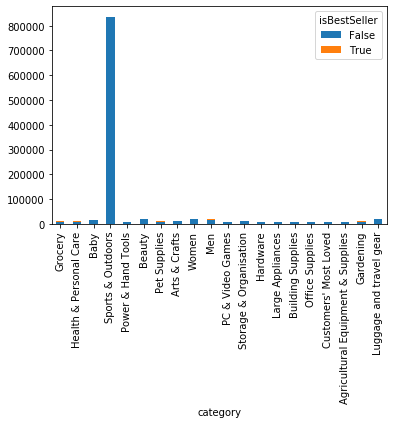

In [7]:
# Plotting a stacked bar chart for the 'cat_best' data
cat_best.sort_values(by=True, ascending=False).head(20).plot(kind="bar", stacked=True)

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands
Objective: Investigate how different product categories influence product prices.

0. Preliminary Step: Remove outliers in product prices.
    For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
    Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.



In [8]:
IQR = df["price"].quantile(0.75) - df["price"].quantile(0.25)
p_low = df["price"].quantile(0.25) - (1.5*IQR)
p_high = df["price"].quantile(0.75) + (1.5*IQR)
df_new = df[df["price"]< p_high]

1. Violin Plots:
    - Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.



In [9]:
top20cat = pd.crosstab(df_new["category"], columns="count")
top20cat = top20cat.sort_values(by="count", ascending=False).head(20)
top20cat = pd.merge(top20cat, df_new, on='category')

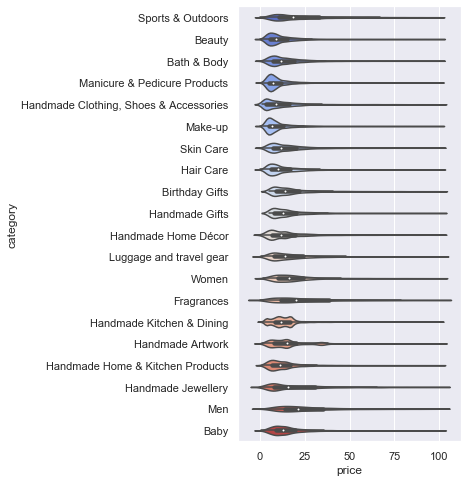

In [16]:
# Plotting a violin plot to visualize the distribution of 'Price' for each 'category'
sns.violinplot(data=top20cat, x='price', y='category', palette="coolwarm")
sns.set(rc={"figure.figsize":(8, 4)})

In [21]:
df_new.groupby('category')['price'].median().sort_values(ascending=False).head()

category
Desktop PCs       74.00
Boxing Shoes      69.79
Tablets           69.00
Graphics Cards    68.54
Motherboards      67.92
Name: price, dtype: float64

Desktop PCs produc category has the highest median price.

2. Bar Charts:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

In [14]:
top10cat = pd.crosstab(df_new["category"], columns="count")
top10cat = top10cat.sort_values(by="count", ascending=False).head(10)
top10cat = pd.merge(top10cat, df_new, on='category')

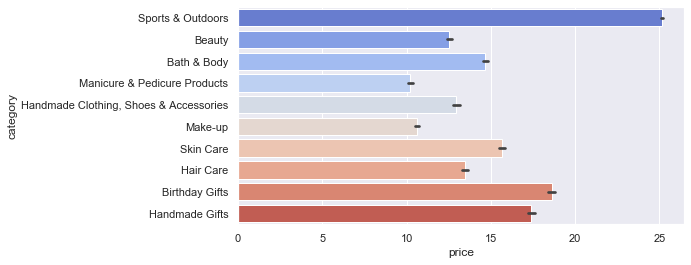

In [17]:
# Plotting a bar plot to visualize the average 'price' for each 'category'
sns.barplot(data=top10cat, x='price', y='category', palette="coolwarm")

In [22]:
df_new.groupby('category')['price'].mean().sort_values(ascending=False).head()

category
Motherboards      68.772432
Boxing Shoes      67.417803
Desktop PCs       66.915562
Tablets           66.552971
Graphics Cards    65.103509
Name: price, dtype: float64

Motherboards product category has the highest average price.

3. Box Plots:
    - Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

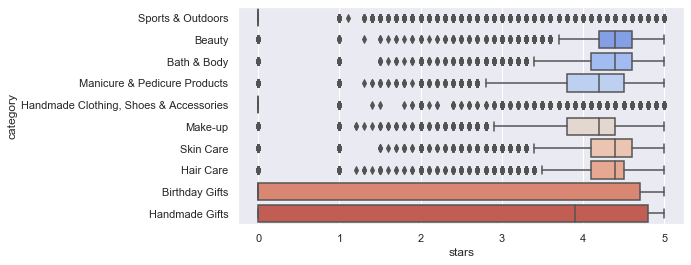

In [25]:
# Plotting a box plot to visualize the spread and outliers of 'stars' for each 'category'
sns.boxplot(data=top10cat, x='stars', y='category', palette="coolwarm")

In [26]:
df_new.groupby('category')['stars'].median().sort_values(ascending=False).head()

category
Computer Memory                 4.7
Building & Construction Toys    4.6
Office Paper Products           4.6
Luxury Food & Drink             4.6
Kids' Play Figures              4.6
Name: stars, dtype: float64

Computer Memory product category tends to receive the highest median rating from costumers.

### Part 3: Investigating the Interplay Between Product Prices and Ratings
Objective: Analyze how product ratings (stars) correlate with product prices.

1. Correlation Coefficients:
    - Calculate the correlation coefficient between price and stars.
    - Is there a significant correlation between product price and its rating?

In [28]:
# Calculating the Pearson correlation coefficient between 'price' and 'stars' columns
correlation = df_new['price'].corr(df_new['stars'])
correlation

-0.07767299878181352

In [29]:
# Calculating the Spearman rank correlation between 'price' and 'stars' columns
correlation = df_new['price'].corr(df_new['stars'], method='spearman')
correlation

-0.06679697280768393

The negative sign indicates that as one variable increases, the other variable tends to decrease slightly. However, the relationship is not strong.

2. Visualizations:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot.

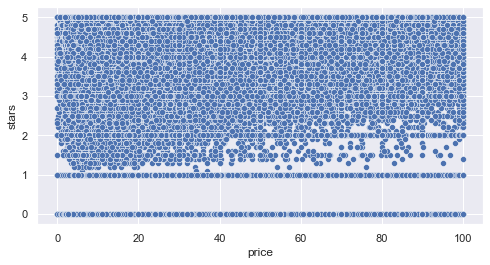

In [30]:
# Plotting a scatter plot to visualize the relationship between 'price' and 'stars'
sns.scatterplot(data=df_new, x='price', y='stars')

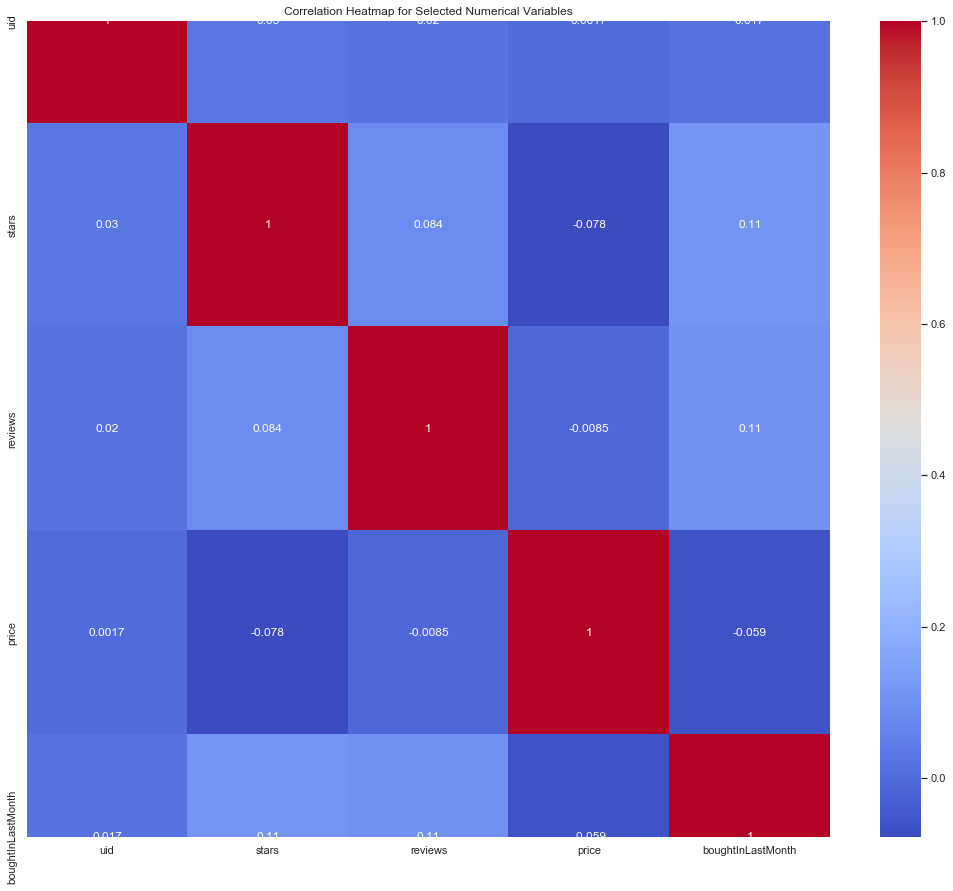

In [35]:
df_new_num = df_new.select_dtypes("number")

correlation_matrix = df_new_num.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


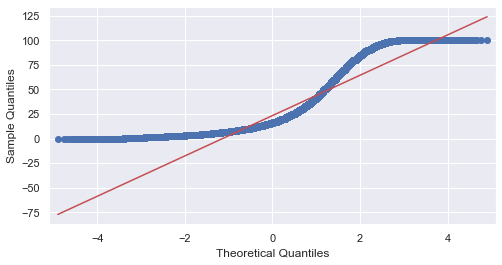

In [37]:
import statsmodels.api as sm

# Generating a Q-Q plot for 'SalePrice' to check if its distribution follows a normal distribution
sm.qqplot(df_new['price'], line='s');

From the QQ Plot above we can examine that the product prices data does not follow a normal distribution.